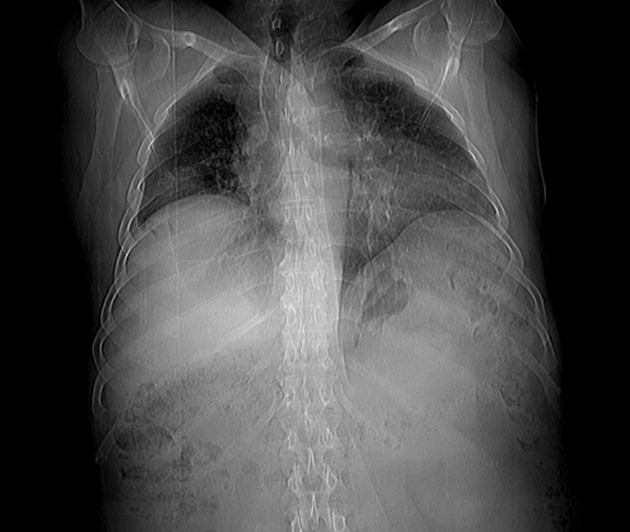

In [13]:
from skimage.filters.thresholding import threshold_otsu
from scipy.misc.pilutil import Image
import scipy.misc
from PIL import Image
# opening the image and converting it to grayscale
a = Image.open('data/ct-scout2.jpeg').convert('L')
a

In [14]:
# a is converted to an ndarray
a = scipy.misc.fromimage(a)
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
# performing Otsu's thresholding
thresh = threshold_otsu(a)
thresh

70

In [17]:
# pixels with intensity greater than theshold are kept
b = a > thresh
b

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
# b is converted from ndimage to
b = scipy.misc.toimage(b)

# saving the image as sk_otsu.png
#b.save('../Figures/otsu_semoutput.png')

/home/sara/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:222: skimage_deprecation: Function ``threshold_adaptive`` is deprecated and will be removed in version 0.15. Use ``threshold_local`` instead.
  def threshold_adaptive(image, block_size, method='gaussian', offset=0,
/home/sara/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:224: UserWarning: The return value of `threshold_local` is a threshold image, while `threshold_adaptive` returned the *thresholded* image.
  warn('The return value of `threshold_local` is a threshold image, while '


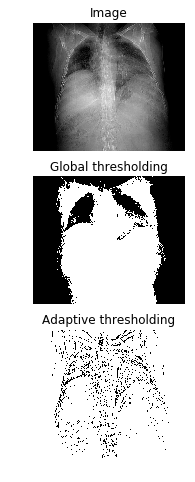

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_adaptive
import numpy

ime = Image.open('data/ct-scout2.jpeg')
image = numpy.array(ime)
    
global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 35
binary_adaptive = threshold_adaptive(image, block_size, offset=10)

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax0, ax1, ax2 = axes
plt.gray()

ax0.imshow(image)
ax0.set_title('Image')

ax1.imshow(binary_global)
ax1.set_title('Global thresholding')

ax2.imshow(binary_adaptive)
ax2.set_title('Adaptive thresholding')

for ax in axes:
    ax.axis('off')

plt.show()